In [25]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
import matplotlib.pyplot as plt
from scipy.stats import zscore
import pingouin as pg

In [2]:
df_hoteis = pd.read_csv('./datasets/hoteis.csv')

In [3]:
df_hoteis.head()

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


In [4]:
df_hoteis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Estrelas            1000 non-null   int64  
 1   ProximidadeTurismo  1000 non-null   float64
 2   Capacidade          1000 non-null   int64  
 3   Preco               1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [5]:
df_hoteis.isna().sum()

Estrelas              0
ProximidadeTurismo    0
Capacidade            0
Preco                 0
dtype: int64

In [6]:
df_hoteis.describe()

,Estrelas,ProximidadeTurismo,Capacidade,Preco
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.008000,7.650878,2.519000,396.611361
std,1.407095,5.870137,1.108543,171.742433
min,1.000000,0.013850,1.000000,-220.208705
25%,2.000000,3.034775,2.000000,283.590980
50%,3.000000,6.430035,3.000000,401.743527
75%,4.000000,10.863295,4.000000,516.097856
max,5.000000,31.709748,4.000000,836.261308


# Claramente o preço min esta errado então tem outliers

<Axes: xlabel='ProximidadeTurismo'>

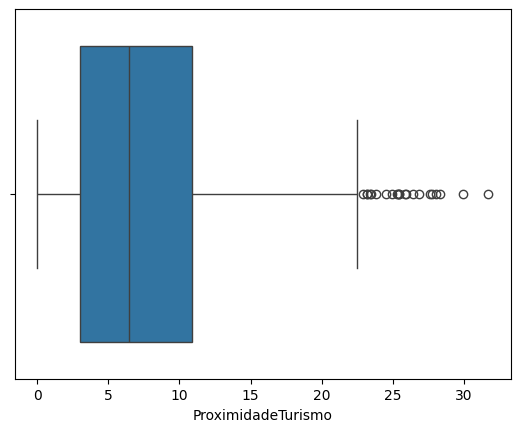

In [7]:
sns.boxplot(data=df_hoteis,x='ProximidadeTurismo')

<Axes: xlabel='Preco'>

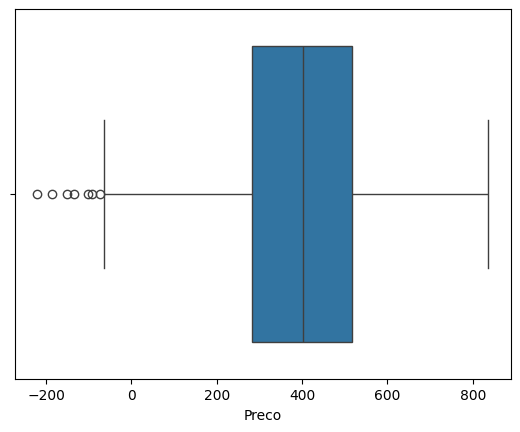

In [8]:
sns.boxplot(data=df_hoteis,x='Preco')

In [9]:
df_hoteis[df_hoteis['Preco'] < 0]

,Estrelas,ProximidadeTurismo,Capacidade,Preco
53,1,23.205943,2,-41.733536
87,3,28.345545,1,-220.208705
229,2,22.259443,2,-13.951666
252,3,25.827966,2,-135.511864
307,1,18.227236,1,-72.942150
345,1,27.593551,1,-150.740785
531,1,19.986395,2,-47.249784
642,3,23.207998,2,-44.456781
755,1,22.904671,2,-93.049061
799,2,19.805656,1,-102.699686


In [10]:
# decidir mudar pela median por ser menos sensivel a outlliers
mediana_preco = df_hoteis.Preco.median()
df_hoteis.Preco = df_hoteis.Preco.map(lambda x: mediana_preco if x < 0  else x)

In [11]:
df_hoteis.describe()

,Estrelas,ProximidadeTurismo,Capacidade,Preco
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.008000,7.650878,2.519000,404.314837
std,1.407095,5.870137,1.108543,160.444846
min,1.000000,0.013850,1.000000,1.605734
25%,2.000000,3.034775,2.000000,293.262096
50%,3.000000,6.430035,3.000000,401.773527
75%,4.000000,10.863295,4.000000,516.097856
max,5.000000,31.709748,4.000000,836.261308


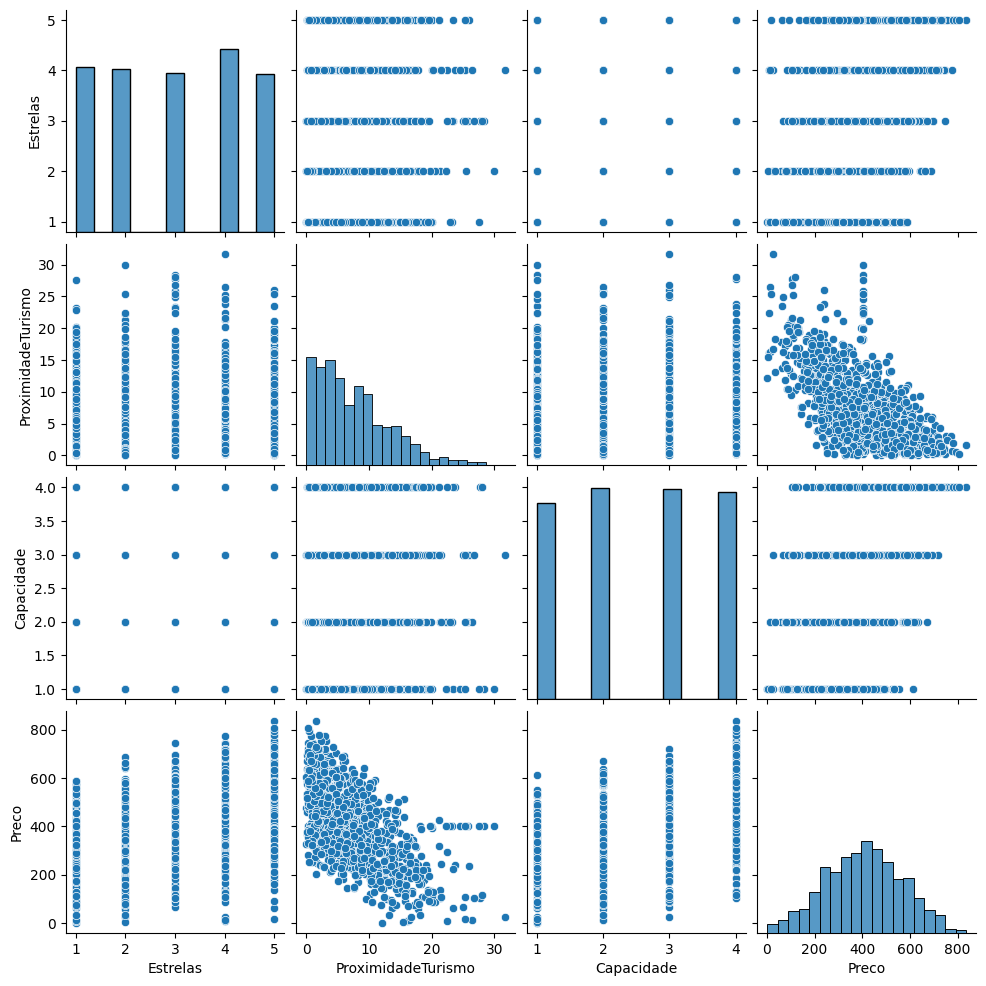

In [12]:
sns.pairplot(df_hoteis)

<Axes: xlabel='ProximidadeTurismo', ylabel='Preco'>

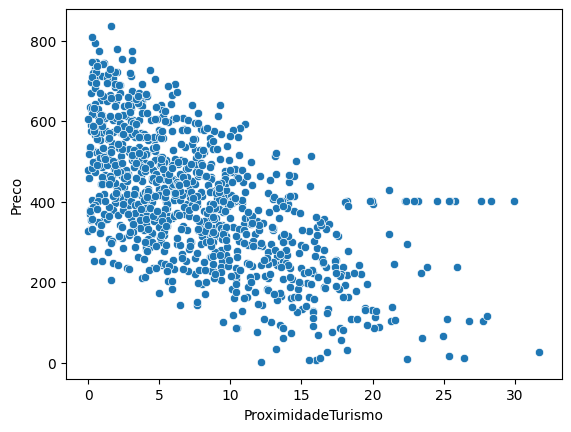

In [13]:
sns.scatterplot(data=df_hoteis, x='ProximidadeTurismo', y='Preco')

<Axes: >

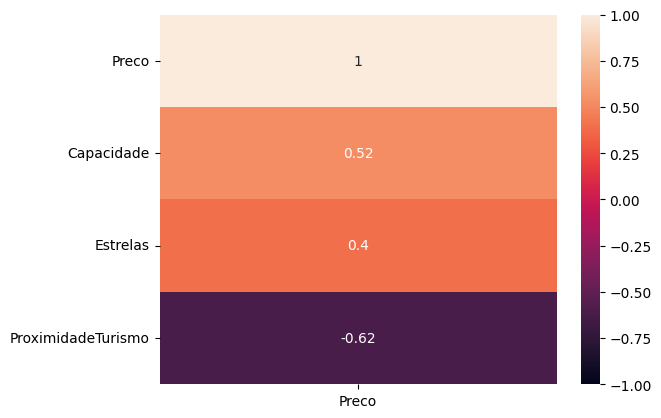

In [14]:
sns.heatmap(df_hoteis.corr()[['Preco']].sort_values(by='Preco', ascending= False)
            , vmin=-1,vmax=1, annot=True)

In [15]:
X = df_hoteis.drop(columns='Preco', axis=1)
y = df_hoteis['Preco']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=50)

In [17]:
modelo = LinearRegression()

In [18]:
modelo.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred = modelo.predict(X_test)

In [20]:
r2_score(y_test,y_pred)

0.8373283227631544

In [21]:
mean_absolute_error(y_test, y_pred)

46.141095743882914

In [22]:
root_mean_squared_error(y_test, y_pred)

63.14822306126912

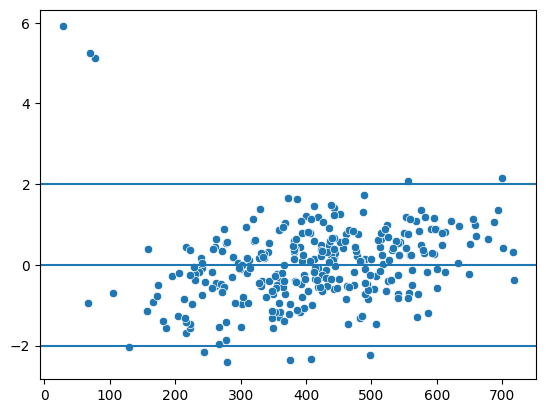

In [24]:
residuos = y_test - y_pred
residuos_std = zscore(residuos)
sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

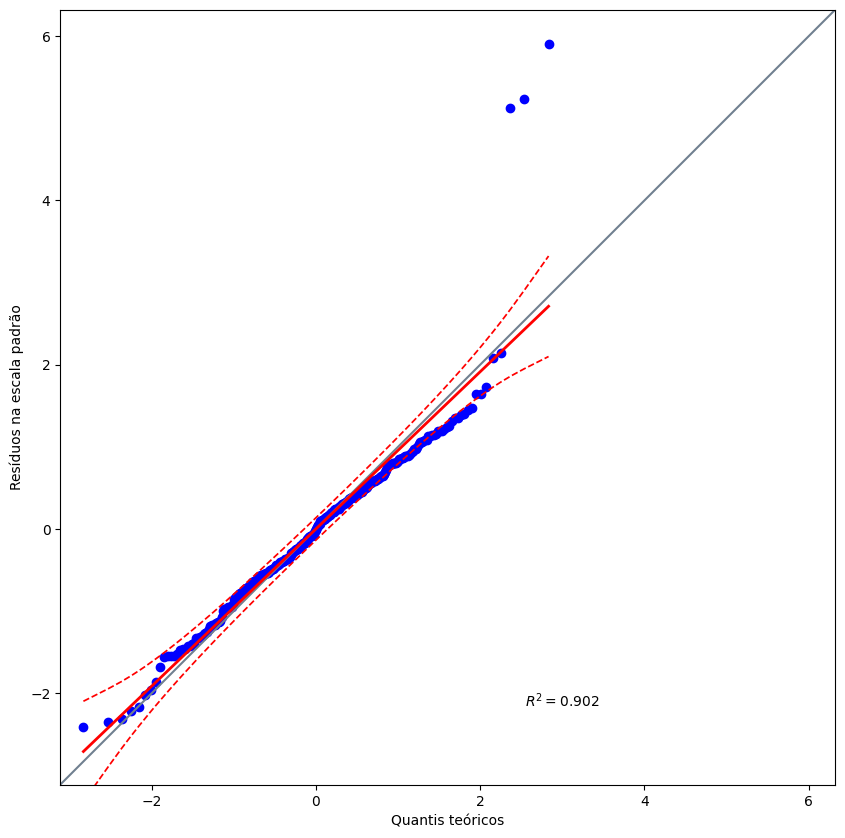

In [26]:
# checar se resíduos seguem uma distribuição normal
# QQ Plot
plt.figure(figsize=(10, 12))
pg.qqplot(residuos_std, dist="norm", confidence=0.95)
plt.xlabel("Quantis teóricos")
plt.ylabel("Resíduos na escala padrão")
plt.show()